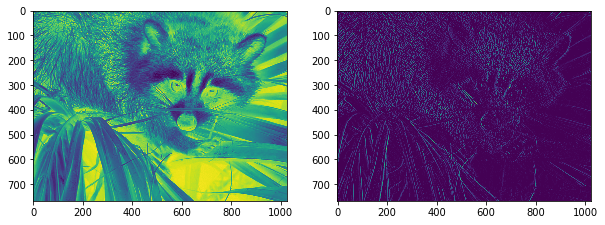

In [1]:
%matplotlib inline
import scipy as sp
import numpy as np
import matplotlib.pylab as plt
import scipy.ndimage # scikit_image
import scipy.misc
# from scipy import *
# 255에서 빼면 색상 반전
img = 255 - sp.misc.face(gray = True).astype(float) # 이미지, 동영상
# edge detection filter - 경계선 검출
k = np.zeros((2,2))
# 1 -1
# 1 -1
k[:, 0] = 1; k[:,1] = -1
# convolve 이미지에서 필터, 정보통신 무선신호 복원
img2 = np.maximum(0, sp.ndimage.filters.convolve(img, k))
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(img)
plt.grid(False)
plt.subplot(122)
plt.imshow(img2)
plt.grid(False)
plt.show()

C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages

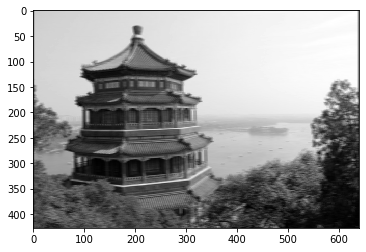

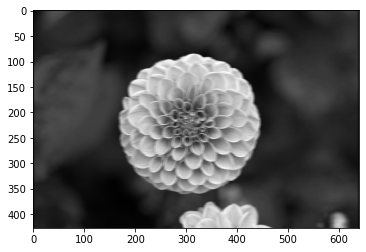

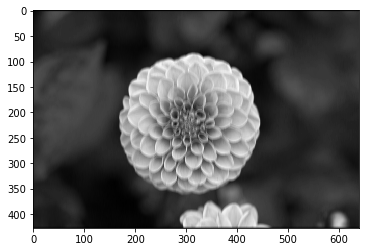

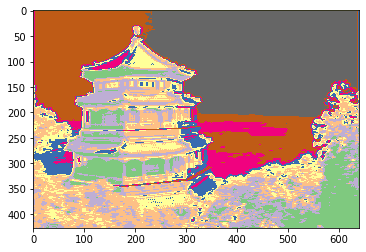

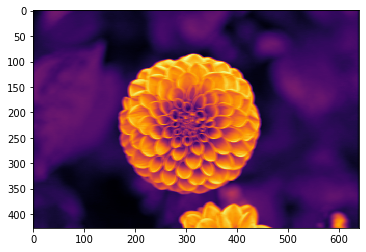

(2, 427, 640, 2)


In [2]:
# import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_image
import tensorflow as tf

# 1, height, width, channels => 4차원 (4차원으로 맞추려고 '1,' 추가)
china = load_sample_image("china.jpg") # 사진1
flower = load_sample_image('flower.jpg') # 사진2 : 사진이 두 장이라 자동으로 4차원이 되는거?
dataset = np.array([china, flower], dtype=np.float32)
batch_size, height, width, channels = dataset.shape # 장수, 높이, 넓이, 컬러수-RGB [ 2, 427(행-높이), 640(열-가로), 2 ]
filters = np.zeros(shape =(7, 7, channels, 2), dtype=np.float32) # 가로세로 7, 2장
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
filters[:, 3, :, 0] = 1
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
# 0 0 0 1 0 0 0
filters[3, :, :, 1] = 1
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 1 1 1 1 1 1 1
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
# 0 0 0 0 0 0 0
filters[2, :, :, 1] = 1

X = tf.placeholder(tf.float32, shape = (None, height, width, channels)) # 주입변수 2, 427, 640, 3 (컬러) => 단색
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding = "SAME") # 이미지 포맷 결정 427, 640
# stride를 1,2,2,1 로 하면 이미지 사이즈가 1/2로 줄어듬
# padding='valid'로 하면 421, 634로 나옴 == 원래 사이즈 - 7 + 1

with tf.Session() as sess: # graph(mode + edge)
    output = sess.run(convolution, feed_dict={X:dataset})
plt.imshow(output[0, :, :, 1], cmap = 'gray')
plt.show()
plt.imshow(output[1, :, :, 1], cmap = 'gray')
plt.show()
plt.imshow(output[1, :, :, 0], cmap = 'gray')
plt.show()
plt.imshow(output[0, :, :, 1], cmap = 'Accent')
plt.show()
plt.imshow(output[1, :, :, 1], cmap = 'inferno')
plt.show()

type(output)
print(output.shape)
# 스트라이드가 1일 때 2, 427, 640, 2

# 필터가 두 개니까 사진이 두 장 나옴?

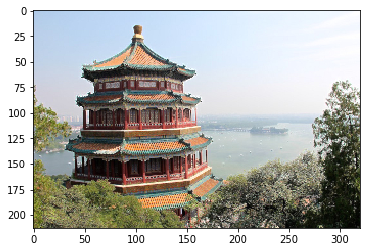

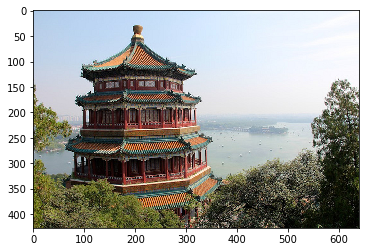

In [3]:
# max pooling 된 결과를 이미지로 출력하시오
# conv2d 채널 1개로 생성
# 채널을 그대로 = 컬러 출력
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding = "VALID")

with tf.Session() as sess: # graph(mode + edge)
    output = sess.run(max_pool, feed_dict={X:dataset})
plt.imshow(output[0].astype(np.uint8)) # unsigned int 형 (양수)
plt.show()
plt.imshow(china) # 원본

In [4]:
def plot_image(image):
    plt.imshow(image, cmap='gray', interpolation ='nearest')
    plt.axis("off")

def plot_color_image(image):
    plt.imshow(image, astype(np.uint8), interpolation ='nearest')
    plt.axis("off")

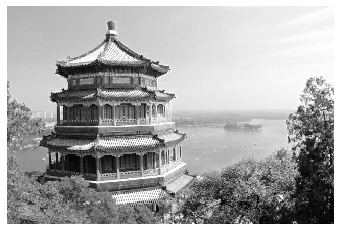

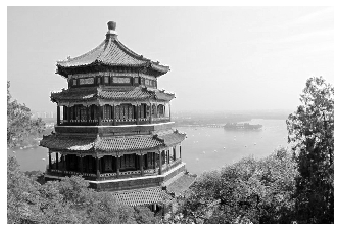

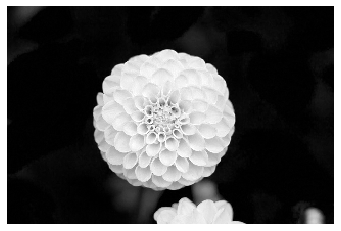

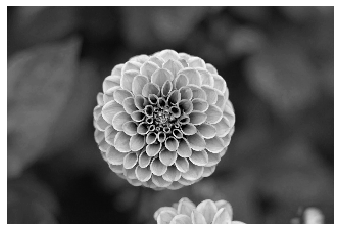

In [5]:
for image_index in (0,1):
    for feature_map_index in (0,1):
        plot_image(output[image_index, :, :, feature_map_index])
        plt.show()

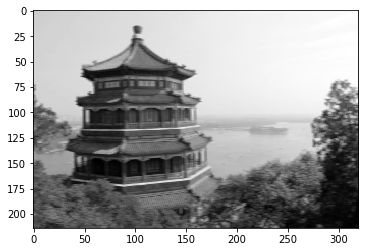

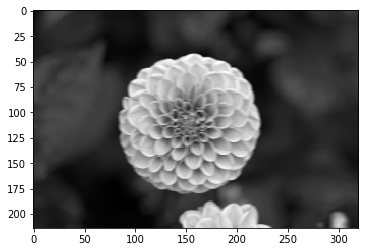

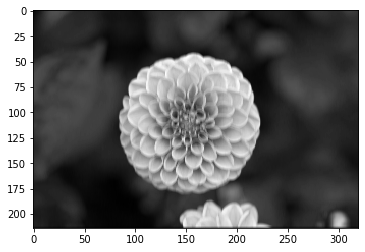

(2, 214, 320, 2)


In [6]:
X = tf.placeholder(tf.float32, shape = (None, height, width, channels)) # 주입변수 2, 427, 640, 3 (컬러) => 단색
convolution = tf.nn.conv2d(X, filters, strides=[1,1,1,1], padding = "SAME") # 이미지 포맷 결정 427, 640
max_pool = tf.nn.max_pool(convolution, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME') # 2x2
# stride를 1,2,2,1 로 하면 이미지 사이즈가 1/2로 줄어듬
# padding='valid'로 하면 421, 634로 나옴 == 원래 사이즈 - 7 + 1

with tf.Session() as sess: # graph(mode + edge)
    output = sess.run(max_pool, feed_dict={X: dataset})
plt.imshow(output[0, :, :, 1], cmap = 'gray')
plt.show()
plt.imshow(output[1, :, :, 1], cmap = 'gray')
plt.show()
plt.imshow(output[1, :, :, 0], cmap = 'gray')
plt.show()

type(output)
print(output.shape)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data\t10k-images-idx3-ubyte.gz
Extracting /tmp/data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


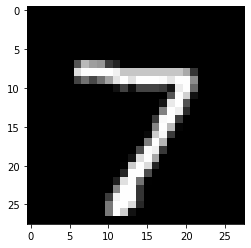

In [7]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as p
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)
first_image = mnist.test.images[0] # 784
pixels = first_image.reshape((28, 28)) # 28*28=784
plt.imshow(pixels, cmap='gray')
plt.show()

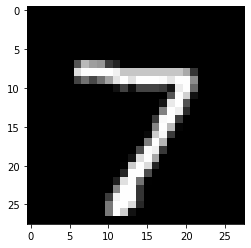

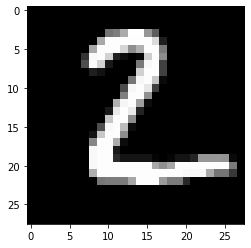

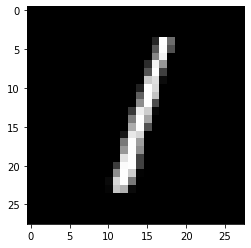

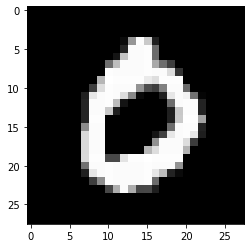

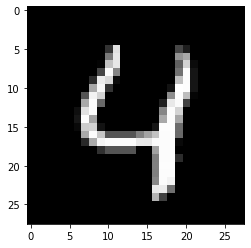

In [8]:
# 5장의 이미지를 출력하기 ###################################################
first_image = mnist.test.images[0:5] # 784
first_image = np.array(first_image, dtype='float')
for i in range(5):
    pixels = first_image[i].reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    plt.show()

In [9]:
learning_rate = 0.001 # optimizer 사용
num_steps = 500 # epoch
batch_size = 128 # mini batch size
display_step = 10 # 시각화
# 변수 784
num_input = 784 # 이미지 28x28=784 => fully-connect (한 줄로 데이터를 만듬)
num_classes = 10 # one-hot-encoding
dropout = 0.75 # 과적합 방지를 위해 임의적으로 25% 계산: random-임의적으로 진행

X = tf.placeholder(tf.float32, [None, num_input], name="input") # 훈련
Y = tf.placeholder(tf.float32, [None, num_classes], name="output") # 종속변수
keep_prob = tf.placeholder(tf.float32, name="keep")

In [10]:
# 1번 이상 반복되면 함수화해라
# activation function 마지막에 한번 호출: 회귀, 분류
# multi-layer에서 XOR 문제를 해결하는 것은 activation 함수를 이용해서 비선형
# cnn => deep 할 수록 결과가 좋음
def conv2d(x, W, b, strides =1):
    x = tf.nn.conv2d(x, W, strides = [1, strides, strides, 1], padding ="SAME")
    x = tf.nn.bias_add(x,b)
    return tf.nn.relu(x) # 비선형 mapping

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k ,k ,1], strides=[1, k, k, 1], padding='SAME')
# 이미지 사이즈 => 필터 사이즈 결정

In [11]:
def conv_net(x, weights, biases, dropout): # 128 X 784
    x = tf.reshape(x, shape=[-1, 28, 28, 1]) # 원래 이미지 형태 128X28X28X1 - 필터가 32장(각기 다른 특징)
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) # 128X28X28X32
    conv1 = maxpool2d(conv1, k=2) # 풀링은 이미지 사이즈만 줄여줌. 128X14X14X32(특징)
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2) # 128X7X7X64 - 차수를 무시하고 1열로 만듬(1차원)
    # CNN 특징 추출 => FFNN (Feed Forward Neural Network)
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]]) # 128X7*7*64, 7*7*64, 1024 => 128X1024 # fully-connected
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout) # dropout 25% - 과적합을 피하기 위해 일부를 계산에서 제외
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out']) # 128X1024, 1024X10=> 128X10
    return out

In [12]:
weights = {'wc1': tf.Variable(tf.random_normal([5,5,1,32])), # 필터 사이즈
           'wc2': tf.Variable(tf.random_normal([5,5,32,64])), 
           'wd1': tf.Variable(tf.random_normal([7*7*64 ,1024])), 
           'out': tf.Variable(tf.random_normal([1024, num_classes]))
          }
biases = {'bc1': tf.Variable(tf.random_normal([32])), 
          'bc2': tf.Variable(tf.random_normal([64])),
          'bd1': tf.Variable(tf.random_normal([1024])),
          'out': tf.Variable(tf.random_normal([num_classes])),
         }

In [13]:
logits = conv_net(X, weights, biases, keep_prob) # 128x10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
init = tf.global_variables_initializer()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess. run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
            print("Step " + str(step) + ", Minibatch Loss= " +"{:.4f}".format(loss) + ", Training Accuracy= " + "{:.3f}". format(acc))
    print("Testing Accuracy:", 
          sess.run(accuracy, feed_dict={X: mnist.test.images[:256], Y: mnist.test.labels[:256], keep_prob: 1.0}))

Step 1, Minibatch Loss= 45069.0000, Training Accuracy= 0.133
Step 10, Minibatch Loss= 13695.7363, Training Accuracy= 0.367
Step 20, Minibatch Loss= 7302.1143, Training Accuracy= 0.680
Step 30, Minibatch Loss= 4719.4531, Training Accuracy= 0.680
Step 40, Minibatch Loss= 2765.6670, Training Accuracy= 0.797
Step 50, Minibatch Loss= 2988.0259, Training Accuracy= 0.820
Step 60, Minibatch Loss= 3089.6689, Training Accuracy= 0.859
Step 70, Minibatch Loss= 1279.4827, Training Accuracy= 0.836
Step 80, Minibatch Loss= 2334.8381, Training Accuracy= 0.875
Step 90, Minibatch Loss= 851.5413, Training Accuracy= 0.922
Step 100, Minibatch Loss= 1630.3312, Training Accuracy= 0.891
Step 110, Minibatch Loss= 1785.9794, Training Accuracy= 0.891
Step 120, Minibatch Loss= 1515.2195, Training Accuracy= 0.891
Step 130, Minibatch Loss= 2084.9082, Training Accuracy= 0.891
Step 140, Minibatch Loss= 1393.8029, Training Accuracy= 0.883
Step 150, Minibatch Loss= 1481.3649, Training Accuracy= 0.906
Step 160, Minibatc

In [15]:
# 문제 테스트 데이터 100번부터 20개의 데이터를 예측해보시오
logits = conv_net(X, weights, biases, keep_prob) # 128 x 10
prediction = tf.nn.softmax(logits)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(
logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)
correct_pred = tf.equal(tf.argmax(prediction, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name="accuracy")

tf.add_to_collection('accuracy', accuracy)
tf.add_to_collection("Xi", X)
tf.add_to_collection("Yi", Y)
init = tf.global_variables_initializer()

saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train_op, feed_dict = {X: batch_x, Y: batch_y, keep_prob: dropout})
        if step % display_step == 0 or step == 1:
            loss, acc = sess. run([loss_op, accuracy], feed_dict={X: batch_x, Y: batch_y, keep_prob:1.0})
            print("Step " + str(step) + ", Minibatch Loss= " +"{:.4f}".format(loss) + ", Training Accuracy= " + "{:.3f}".format(acc))
    save_path = saver.save(sess, 'data/cnn_model.ckpt')
    print("Testing Accuracy:", 
          sess.run(accuracy, feed_dict={X: mnist.test.images[:256], Y: mnist.test.labels[:256], keep_prob: 1.0}))
    print("예측:", 
          sess.run(tf.argmax(prediction,1), feed_dict={X: mnist.test.images[100:120], Y: mnist.test.labels[100:120], keep_prob: 1.0}))

Step 1, Minibatch Loss= 59352.0547, Training Accuracy= 0.188
Step 10, Minibatch Loss= 19297.8789, Training Accuracy= 0.352
Step 20, Minibatch Loss= 9383.5938, Training Accuracy= 0.594
Step 30, Minibatch Loss= 6546.9043, Training Accuracy= 0.734
Step 40, Minibatch Loss= 2848.2542, Training Accuracy= 0.844
Step 50, Minibatch Loss= 4643.9209, Training Accuracy= 0.797
Step 60, Minibatch Loss= 3023.2498, Training Accuracy= 0.844
Step 70, Minibatch Loss= 2861.7095, Training Accuracy= 0.883
Step 80, Minibatch Loss= 3327.9902, Training Accuracy= 0.875
Step 90, Minibatch Loss= 1775.6329, Training Accuracy= 0.914
Step 100, Minibatch Loss= 2032.5724, Training Accuracy= 0.891
Step 110, Minibatch Loss= 1697.6233, Training Accuracy= 0.914
Step 120, Minibatch Loss= 1646.5483, Training Accuracy= 0.906
Step 130, Minibatch Loss= 1532.6876, Training Accuracy= 0.906
Step 140, Minibatch Loss= 2446.5151, Training Accuracy= 0.875
Step 150, Minibatch Loss= 664.2508, Training Accuracy= 0.938
Step 160, Minibatc

In [18]:
# 문제: 저장된 모델을 로딩한 다음 테스트 데이터 100번부터 20개의 데이터를 예측하여 출력하고 정확도를 출력하시오
import tensorflow as tf
tf.set_random_seed(777)
sess = tf.InteractiveSession()
new_saver = tf.train.import_meta_graph("data/cnn_model.ckpt.meta")
new_saver.restore(sess, "data/cnn_model.ckpt")
tf.get_default_graph()
Xi = sess.graph.get_tensor_by_name("input:0") # :0 : 장치번호
Yi = sess.graph.get_tensor_by_name("output:0")
keep = sess.graph.get_tensor_by_name("keep:0")
accuracy = sess.graph.get_tensor_by_name("accuracy:0")
result = sess.run(accuracy, feed_dict={Xi:mnist.test.images[:256], Yi:mnist.test.labels[:256], keep:1.0})
print(result)

pred = sess.run(tf.argmax(prediction, 1), feed_dict={X: mnist.test.images[100:120], Y: mnist.test.labels[100:120], keep_prob: 1.0})
print(pred)
print(mnist.test.labels[100:120])
result = sess.run(accuracy, feed_dict={Xi: mnist.test.images[100:120], Yi: mnist.test.labels[100:120], keep: 1.0})
print(result)

C:\Users\ICT01_12\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\client\session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from data/cnn_model.ckpt
0.96484375
[6 0 5 4 9 9 2 1 9 4 8 7 3 9 7 4 4 4 9 2]
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]
1.0
